In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\Users\a\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.drop(106,axis=0,inplace=True)

In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [6]:
df.drop(105,axis=0,inplace=True)

In [7]:
df.columns=['Month','Sales per month' ]

In [8]:
df.head()

,Month,Sales per month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df

,Month,Sales per month
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
5,1964-06-01,3036.0
6,1964-07-01,2282.0
7,1964-08-01,2212.0
8,1964-09-01,2922.0
9,1964-10-01,4301.0


In [11]:
df.set_index('Month',inplace=True)

In [12]:
df.head()

,Sales per month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


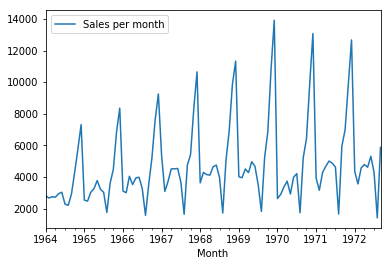

In [13]:
df.plot()
plt.show()

### ARIMA models are used because they can reduce a non-stationary series to a stationary series using a sequence of differencing steps.

In [14]:
model=sm.tsa.statespace.SARIMAX(df['Sales per month'],seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\a\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\a\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


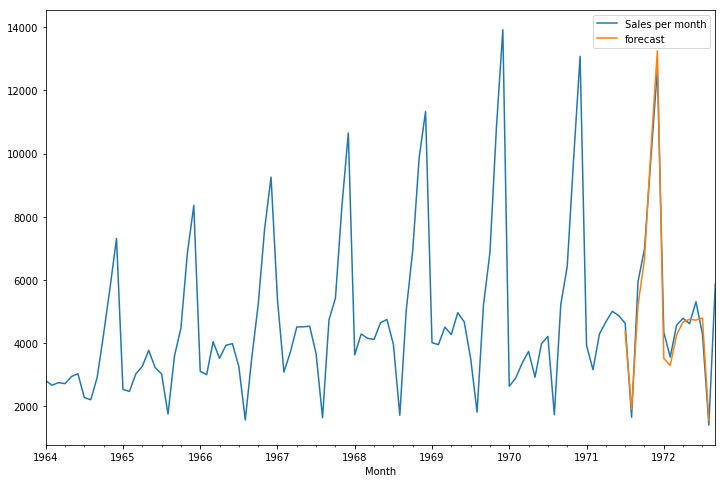

In [17]:
df['forecast']=results.predict(start=90,end=103)
df[['Sales per month','forecast']].plot(figsize=(12,8))
plt.show()